# Milestone 4 - Independent Project

## Author - Logan Downing

Datasci 410  
May 31, 2018



# Welcome to the King County Home Price Estimator™!
## Your partner in home pricing for King County MLS listings



We are delighted you are interested in using our home pricing services. We are proud to have worked with 10,000 homeowners just like you to estimate the best listing price for your home. When you list your home with a realistic  price, your home sells faster, gets more bids, and will close sooner than the typical listing.

<img src="https://snohomishcountywa.gov/DocumentCenter/View/28704/Conover-Cottage-Houses"
     alt=""
     width="300px"
     style="float: right; margin-left: 12px; border-bottom:20px black solid;" />

**Here's how it works:**

We analyze <a href="https://public.tableau.com/profile/logan.downing#!/vizhome/KingCountyHomeSales/Dashboard" target="_blank">thousands of completed home sales in King County</a> to create a robust model. Data scientists on our staff take a rigorous approach to finding the most important factors to predict the actual sales price. In addition, we've analyzed the characteristics of homes that contribute to pricing, for example, whether a view or a waterfront makes a difference in selling price. When you are ready to list, we'll work with you to input your home's data, and estimate the best listing price.

It's that simple.

This backgrounder goes over the details of our services, to give you a better sense of what we do and how we do it. We'll mix in a little bit of technical lingo along with overall recommenations and findings. You may wish to share this information with your listing agent, who can help you further refine your listing.

Thanks again for your interest in the Home Price Estimator,™ your best friend when it comes to listing your home.

Cordially,

Logan Downing  
President  
King County Home Price Estimator™

In [62]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import, quality control and clean dataset
Here we read in our dataset, drop any uninteresting features, and interpret the remaining columns. Later on we'll whittle down our features into a highly-predictive set. But for now, let's just take a look at all the candidates.

In [63]:
# location of dataset
f = 'kc_house_data.csv' # local version, if the online version goes away
#f = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'

# grab data
df = pd.read_csv(f)
df0 = df.copy() # raw copy, for reference
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [64]:
# drop columns that we don't care about
df.drop('id',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)
df.drop('sqft_above',axis=1,inplace=True)
df.drop('sqft_basement',axis=1,inplace=True)
df.drop('lat',axis=1,inplace=True)
df.drop('long',axis=1,inplace=True)
df.drop('sqft_living15',axis=1,inplace=True)
df.drop('sqft_lot15',axis=1,inplace=True)

# drop condition, since it duplicates the "grade" column
df.drop('condition',axis=1,inplace=True)

# create a new column, effective_age, that represents the most 
# recent of: yr_built and yr_renovated. units will be "years ago,"
# so, for instance, a home renovated in 2000 would have an effective_age
# of 15 years. (dataset is dated 2015).
df['effective_age'] = df.yr_renovated - df.yr_built
df.loc[df.effective_age>0, 'effective_age'] = 2015 - df.yr_renovated
df.loc[df.effective_age<0, 'effective_age'] = 2015+df.effective_age

# and drop the no-longer needed fields that have years in them:
df.drop('yr_built',axis=1,inplace=True)
df.drop('yr_renovated',axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
grade            21613 non-null int64
zipcode          21613 non-null int64
effective_age    21613 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [66]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view         grade       zipcode  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      7.656873  98077.939805   
std        0.539989      0.086517      0.766318      1.175459     53.505026   
min        1.000000      0.000000      0.000000      1.000000  98001.000000   
25%        1.000000      0.000000      0.000000      7.000000  98033.000000   
50%        1.500000      0.000000      0.000000      7.000000  98065.000000   
75%        2.000000      0.000000      0.000000      8.000000  98118.000000   
max        3.500000      1.000000      4.000000     13.000000  98199.000000   

       effective_age  
count   21613.000000  
mean       41.613982  
std        28.806854  
min         0.000000  
25%        16.000000  
50%        38.000000  
75%        61.000000  
max       115.000000

In [67]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  grade  zipcode  effective_age  
0     0      7    98178             60  
1     0      7    98125             24  
2     0      6    98028             82  
3     0      7    98136             50  
4     0      8    98074             28

### Apply our "middle-class filters" to focus on the homes we want
Our job is to support middle-class homebuyers and sellers. Therefore, we can discard the McMansions and 8-plexes from our consideration. While we hate to say it, homes selling for $2 million actually do qualify as "middle class" in the Seattle area.

In [68]:
# discard 198 homes that exceed $2M
max_saleprice = 2000000
df=df[df.price<=max_saleprice]

# discard 211 homes that exceed 5,000 sqft in living space
max_sqft_living = 5000
df=df[df.sqft_living<=max_sqft_living]

# discard 62 homes that exceed 6 bath
max_bath = 6
df=df[df.bathrooms<=max_bath]

# discard 21 homes that exceed 7 bedrooms
max_beds = 7
df=df[df.bedrooms<=max_beds]

# discard 1,057 homes that exceed 1 acre lot size 
max_acres = 1
df=df[df.sqft_lot<=max_acres*43560] # 1 acre = 43,560 sqft

# discard 29 homes below grade 5, these are not appropriate for families
min_grade = 5
df=df[df.grade>=min_grade]

After applying our middle-class filters, we have 20,238 records remaining. Here's how those records look:

In [69]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.023800e+04  20238.000000  20238.000000  20238.000000  20238.000000   
mean   5.100864e+05      3.348651      2.076304   2003.585483   8740.019172   
std    2.792861e+05      0.879505      0.726890    798.129482   6702.515880   
min    7.800000e+04      0.000000      0.000000    370.000000    520.000000   
25%    3.155000e+05      3.000000      1.500000   1400.000000   5000.000000   
50%    4.415000e+05      3.000000      2.250000   1870.000000   7364.000000   
75%    6.250000e+05      4.000000      2.500000   2480.000000   9900.000000   
max    2.000000e+06      7.000000      5.750000   5000.000000  43560.000000   

             floors    waterfront          view         grade       zipcode  \
count  20238.000000  20238.000000  20238.000000  20238.000000  20238.000000   
mean       1.487351      0.005040      0.206542      7.592302  98079.757338   
std        0.541629      0.070816      0.712819      1.087174     53.970863   
min        1.000000      0.000000      0.000000      5.000000  98001.000000   
25%        1.000000      0.000000      0.000000      7.000000  98033.000000   
50%        1.000000      0.000000      0.000000      7.000000  98072.000000   
75%        2.000000      0.000000      0.000000      8.000000  98118.000000   
max        3.500000      1.000000      4.000000     13.000000  98199.000000   

       effective_age  
count   20238.000000  
mean       42.147248  
std        29.062730  
min         0.000000  
25%        16.000000  
50%        38.000000  
75%        61.000000  
max       115.000000

# Exploratory data analysis
Let's have a look at how some of the more interesting fields are distributed.

### Categorical features
Let's start with categorical features and see how they're distributed.

* bedrooms
* bathrooms
* floors


* grade
* waterfront
* view


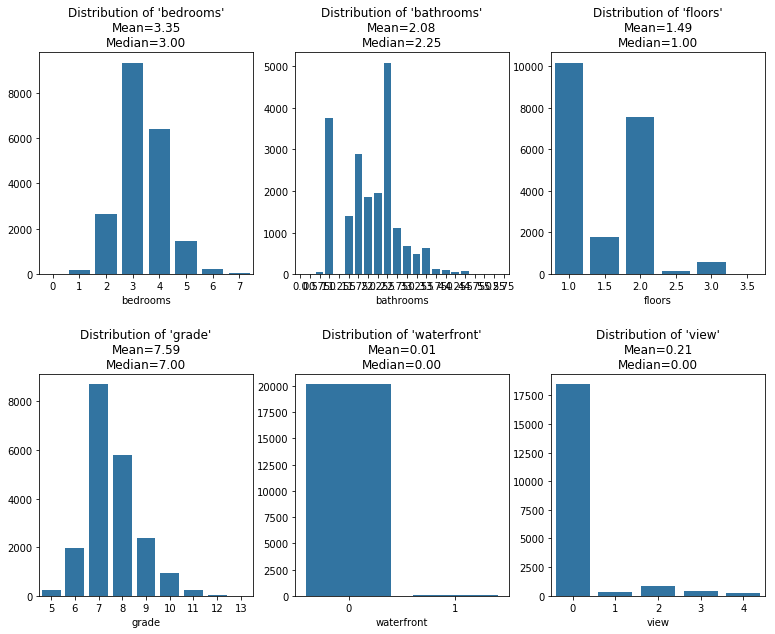

In [70]:
def cat_distplot(dataframe,field='',ax=None):
    sns.countplot(data=dataframe,x=field,color='C0',ax=ax)
    ax.set_title("Distribution of '{}'\nMean={:,.2f}\nMedian={:,.2f}".format(field,np.mean(dataframe[field]),np.median(dataframe[field])))
    ax.set_ylabel("")

fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(13,10),sharey=False)  
plt.subplots_adjust(hspace=.45)

cat_distplot(df,'bedrooms', ax=ax[0,0])
cat_distplot(df,'bathrooms', ax=ax[0,1])
cat_distplot(df,'floors', ax=ax[0,2])

cat_distplot(df,'grade', ax=ax[1,0])
cat_distplot(df,'waterfront', ax=ax[1,1])
cat_distplot(df,'view', ax=ax[1,2])

**Results**: Waterfront and view both look to be very selective, with very lopsided counts. Floors is a bit of a mixture of values. Bedrooms, bathrooms and grade are distributed more normal-ish.

### Numeric features
Next let's look at the three numeric features and see how they are distributed:

* effective_age
* sqft_living 
* sqft_lot

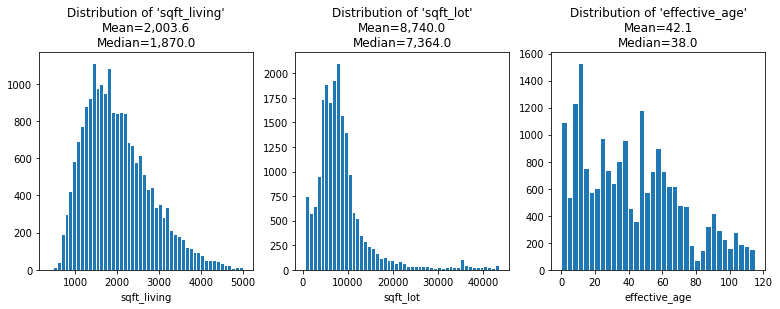

In [71]:
def numeric_distplot(dataframe,field='',ax=None):
    sns.distplot(dataframe[field],kde=False,
                 hist_kws={'color':'C0','edgecolor':'white','alpha':1},
                 ax=ax)
    ax.set_title("Distribution of '{}'\nMean={:,.1f}\nMedian={:,.1f}".format(field,np.mean(dataframe[field]),np.median(dataframe[field])))
    ax.set_ylabel("")

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(13,4),sharey=False)  

numeric_distplot(df,'sqft_living', ax=ax[0])
numeric_distplot(df,'sqft_lot', ax=ax[1])
numeric_distplot(df,'effective_age', ax=ax[2])    

**Results:** sqft_living and sqft_lot appear to be close to normal but right skewed. The effective_age feature shows a complicated distribution and won't be easily characterized. Let's try to center sqft_living and sqft_lot by taking their logs.

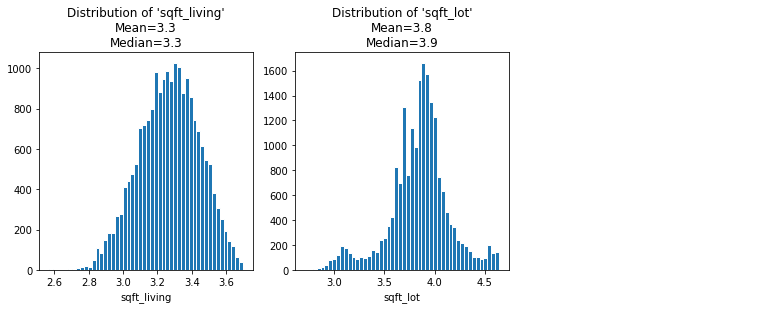

In [72]:
df.sqft_living = np.log10(df.sqft_living)
df.sqft_lot = np.log10(df.sqft_lot)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(13,4),sharey=False)  

numeric_distplot(df,'sqft_living', ax=ax[0])
numeric_distplot(df,'sqft_lot', ax=ax[1])
ax[2].axis('off') # hide the third spot (not used)
_=""

That's a little bit nicer. We'll go with the log of sqft_living and sqft_lot from here on out. 

### Label (predicted value)
And finally let's get a rough sense of how price is distributed. Price is our predicted value. Usually we need to check out log(price) because of its long right tail. Let's plot both. (Note I'm selecting log base 10 to support easy calculation of price to log(price) and vice versa.)

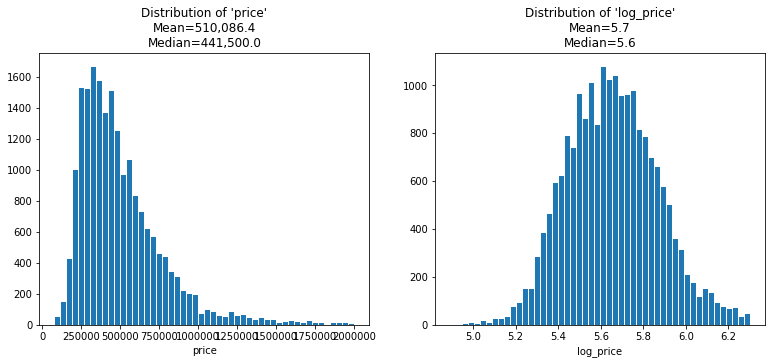

In [73]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,5),sharey=False)  
df['log_price']=np.log10(df.price)
numeric_distplot(df,'price', ax=ax[0])
numeric_distplot(df,'log_price', ax=ax[1])   

The log_price shows a very nicely-shaped, normal-ish curve. Let's test this distribution to see if we're indeed dealing with a normal curve. We'll do a Q-Q plot.

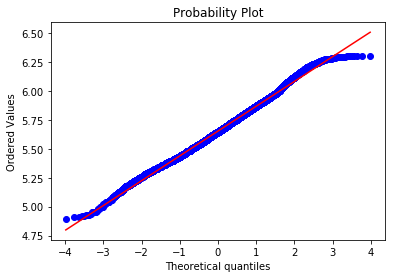

In [74]:
import scipy
ax=plt.figure().gca()
scipy.stats.probplot(df.log_price,plot=ax,dist='norm')
_=""

**Results:** The Q-Q plot of log_price looks reasonable normal through almost its entire range. There is only a divergence at the left and right tail. We'll go with an assumption of normal distribution for log_price from here on out.

### Correlations of features with log(price) and between individual features
Let's get a high-level sense of how most of the features correlate with price, and with each other. This is to get a feeling for which features may be strong contributors, and which need to be engineered. We'll do much more with these later.

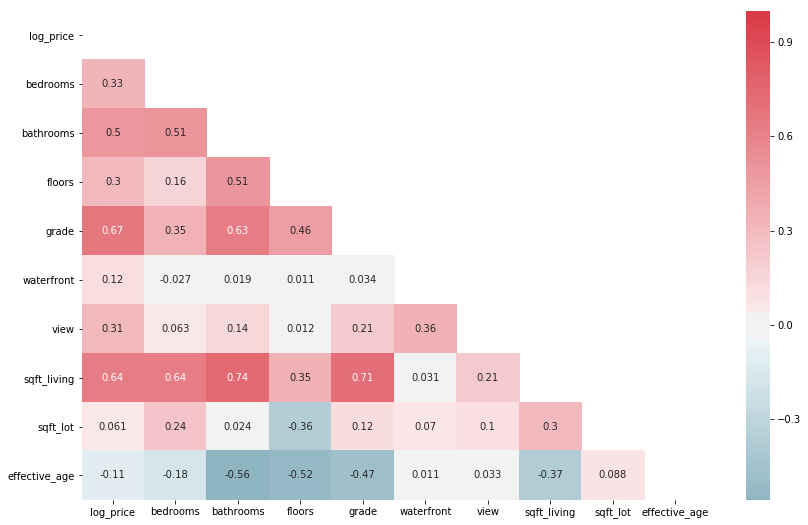

In [75]:
# which fields to examine:
fields=['log_price','bedrooms','bathrooms','floors', 'grade', 'waterfront', 
        'view', 'sqft_living', 'sqft_lot', 'effective_age']
#sns.pairplot(data=df[fields])

corr=df[fields].corr()

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(14,9))
sns.heatmap(corr,  center=0, cmap=cmap, annot=True, mask=mask)
_=""

**Results:** Not surprisingly, most features are positively correlated with price. Only effective_age is negatively correlated, which makes sense: as a home ages the price drops.

* **Highly correlated with price:** 
  These features have a large, positive correlation with price:
  * sqft_living
  * grade
  * bathrooms
  
  Additional features like bedrooms and view are also somewhat correlated with price  
    
  
* **Highly correlated with each other:**  
  These features show a large positive correlation with each other:
  * sqft_living with: bedrooms, bathrooms, and grade
  * grade with: bathrooms, floors
  
  These features show a large negative correlation with each other:
  * effective_age with: bathrooms, floors, grade
  
In summary, it's looking like sqft_living is a very strong predictor, which also may account for several other features. The only negatively correlated feature is effective_age, so that will be important to factor into our models.

# Hypothesis testing
Here let's look at a few features to see whether they are predictive of a higher selling price. This is important because if your home has these features, our model will estimate a higher listing price.

### Does being on the waterfront contribute to a higher listing price?
We were intrigued earlier (see correlations, above) when waterfront didn't appear to be highly correlated with price. Let's do a quick hypothesis test to see whether there is any effect. 

H<sub>0</sub> = there is no difference in mean prices for homes with and without waterfronts  
H<sub>1</sub> = there is a difference in mean prices for these homes

In [76]:
# shard the homes into two groups: those with and those without waterfronts
a = df[df.waterfront==0]
b = df[df.waterfront!=0]

print("Homes with waterfronts = ", b.shape[0])
print("Homes without waterfronts = ", a.shape[0])
_=""

Homes with waterfronts =  102
Homes without waterfronts =  20136


We'll run a traditional t-test on these two populations to see if there is any statistically significant difference in their means.

In [77]:
# import the t-test code from the notebook
def t_test(a, b, alpha=.05, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b) # generate a t-statistic from a and b 
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b)) # create an opbject containing both sets of data

    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') # generate the confidence interval for the difference in means
    degfree = means.dof_satt() # effective degrees of freedom of Satterthwaite for unequal variance. https://en.wikipedia.org/wiki/Welch%E2%80%93Satterthwaite_equation
    
    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
  
# copy the plotting routines from the notebook
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins,edgecolor='silver')
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'orange', linestyle='--')
    plt.axvline(lower, color = 'orange', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.figure(figsize=(10,7))
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of log(price) for ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    #plt.figure(figsize=(6,6))
    plt.hist(vec, bins = bins,edgecolor='silver')
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
# use like this:
#test = t_test(pop_A, pop_B)
#plot_t(pop_A, pop_B, test) 

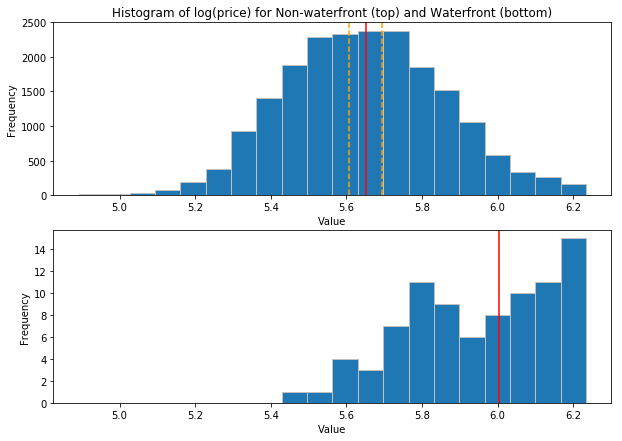

In [78]:
# perform a t-test to see if the means of the populations 
# can be considered the same
test = t_test(a.log_price,b.log_price)

# and plot
plot_t(a.log_price,b.log_price,test,cols=['Non-waterfront (top)','Waterfront (bottom)'])

**Result:** There is no doubt that being on the waterfront is an excellent predictor of a higher sales price. We see this from the graph above, where the mean of log_price for waterfront homes is many standard deviations away from the that for non-waterfront homes.

### Does 'view' contribute to a higher listing price?
There are five different "view" values: 0, 1, 2, 3, 4. Let's see whether being in any one of these categories has a significant effect on sales price. 

Let's start with a visualization of the pricing distributions for each of the categories.

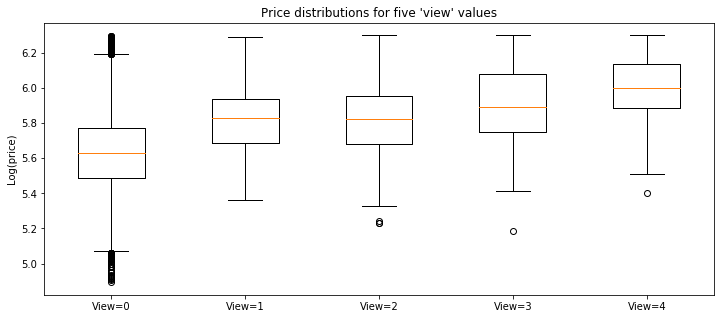

In [79]:
# get the groups of interest
df1 = df[df['view']==0]['log_price'] 
df2 = df[df['view']==1]['log_price']
df3 = df[df['view']==2]['log_price']   
df4 = df[df['view']==3]['log_price']    
df5 = df[df['view']==4]['log_price'] 

ax=plt.figure(figsize=(12,5)).gca()
plt.boxplot([df1, df2, df3, df4, df5])
plt.ylabel('Log(price)')
plt.title("Price distributions for five 'view' values")
ax.set_xticklabels(['View=0','View=1','View=2','View=3','View=4'])
_=""

It's looking likely that increasing views lead to increasing prices. To be sure, since we have five categories, let's use Tukey's HSD approach to pairwise comparisons.

In [80]:
# run the one-way F ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(df1, df2, df3, df4, df5)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 550.189916497
P-value = 0.0


The ANOVA test reveals a miniscule p-value. Therefore we reject the null hypothesis that all five groups share the same mean. At least one of the views differs substantially from the others. Our job is to find it/them.

In [81]:
# run Tukey's ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df_anova = pd.DataFrame({'vals': df1.tolist() + df2.tolist() + df3.tolist() + df4.tolist() + df5.tolist(),
                   'group_num': ['1'] * len(df1) 
                   + ['2'] * len(df2) 
                   + ['3'] * len(df3) 
                   + ['4'] * len(df4) 
                   + ['5'] * len(df5)})
Tukey_HSD = pairwise_tukeyhsd(df_anova.vals, df_anova.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     0.1901   0.158  0.2222  True 
  1      3     0.1851   0.1656 0.2047  True 
  1      4     0.2632   0.2357 0.2906  True 
  1      5     0.3668   0.3298 0.4038  True 
  2      3    -0.0049  -0.0421 0.0322 False 
  2      4     0.0731   0.0312 0.115   True 
  2      5     0.1767   0.1281 0.2254  True 
  3      4     0.078    0.0448 0.1113  True 
  3      5     0.1817   0.1402 0.2232  True 
  4      5     0.1037   0.0579 0.1494  True 
--------------------------------------------


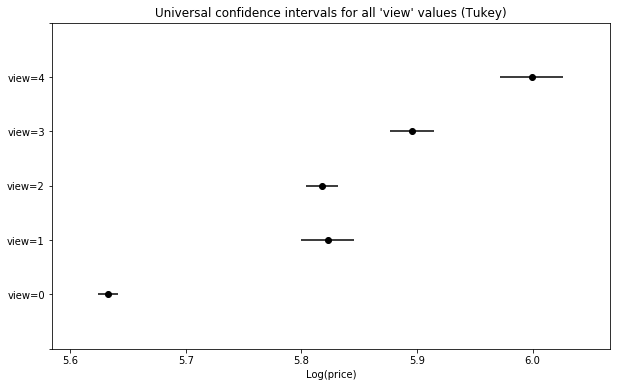

In [82]:
# plot the results of the Tukey ANOVA test
ax=plt.figure().gca()
Tukey_HSD.plot_simultaneous(ax=ax)
ax.set_yticklabels(['','view=0','view=1','view=2','view=3','view=4'])
ax.set_title("Universal confidence intervals for all 'view' values (Tukey)")
ax.set_xlabel("Log(price)")
_=""

**Results:** Not surprisingly, homes with better views sell for higher prices. What's interesting is that homes with a view assessment of '1' or '2' do not have significantly difference sales prices. Therefore, let's merge those view categories together and consider them the same.

In [83]:
print("View counts, before:")
df.view.value_counts()

View counts, before:


0    18434
2      849
3      420
1      306
4      229
Name: view, dtype: int64

In [84]:
df.loc[df.view==1,'view']=2
print("View counts, after:")
df.view.value_counts()

View counts, after:


0    18434
2     1155
3      420
4      229
Name: view, dtype: int64

### What is the price difference between homes with lofts and those without?
It would be interesting to learn whether homes with lofts generally sell for higher prices than those without them. We'll look at the difference between homes with 1 floor and those with 1.5 floors (lofts). If we find a difference in pricing, we'll calculate about how much more you can expect to get for homes with lofts.

In [85]:
# first divide our data into homes with 1 floor (no loft) and homes with 1 floor and a loft
a=df[df.floors==1]
b=df[df.floors==1.5]
print("Single-story homes with no loft (floors=1):",len(a))
print("Single-story homes with a loft (floors=1.5):",len(b))

Single-story homes with no loft (floors=1): 10161
Single-story homes with a loft (floors=1.5): 1781


We'll employ a bootstrap approach to determine the difference in average pricing between homes with and without lofts. Let's sample our two populations multiple times, and enumerate the difference in sample means. This will tell us whether there is indeed a difference in pricing between homes with lofts and those without.

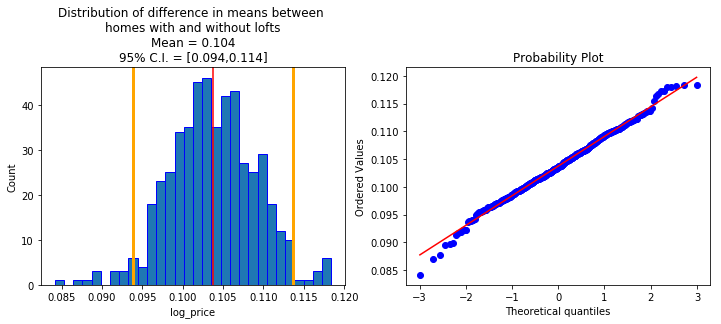

In [86]:
n_replicas = 500
diffs = []
np.random.seed(300)
for i in range(n_replicas):
    sample = df.sample(frac=1, replace=True)
    a_mean = sample[sample.floors == 1].log_price.mean()
    b_mean = sample[sample.floors == 1.5].log_price.mean()
    diffs.append(b_mean - a_mean)
diffs = pd.Series(diffs)

# calculate some statistics
diffs_mean = np.mean(diffs)
diffs_CI95lo = np.percentile(diffs,2.5) # confidence interval 95%
diffs_CI95hi = np.percentile(diffs,97.5)

# and plot them
fig,axes = plt.subplots(1,2,figsize=(12,4))
plt.axes(axes[0])
plt.hist(diffs,bins=30,edgecolor='blue')
plt.axvline(diffs_CI95lo,linewidth=3,color='orange')
plt.axvline(diffs_CI95hi,linewidth=3,color='orange')
plt.axvline(diffs_mean,color='red')
plt.title("Distribution of difference in means between \nhomes with and without lofts\nMean = {:.3f}\n95% C.I. = [{:.3f},{:.3f}]".format(diffs_mean,diffs_CI95lo,diffs_CI95hi))
plt.xlabel("log_price")
plt.ylabel("Count")

# and check the distribution of mean differences, compare with normal
scipy.stats.probplot(diffs,plot=axes[1],dist='norm')
_=""

**Results:** There is statistically-significant price difference between homes with lofts compared to those without. The mean difference in average log_price is 0.104. Translating this to everyday language, if you have a home with a loft, you can expect to get about 24-30% more for it than for homes without a loft.

### How important is zipcode to sales pricing?
Finally, note we have home sales in 70 different zip codes. It will be interesting to know whether we need to account for zip code in our pricing models. Let's run another Tukey ANOVA against these 70 categories, and pick out which, if any, show significance.

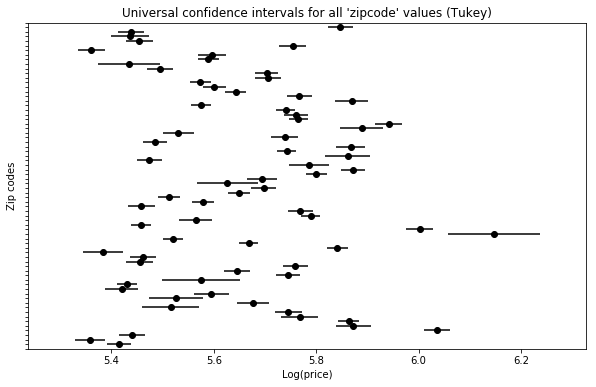

In [87]:
# run Tukey's ANOVA on log_price by zipcode
df_anova = pd.DataFrame({'vals': df.log_price.tolist(),
                   'group_num': df.zipcode.tolist()})
Tukey_HSD = pairwise_tukeyhsd(df_anova.vals, df_anova.group_num)

# plot the results of the Tukey ANOVA test
ax=plt.figure().gca()
Tukey_HSD.plot_simultaneous(ax=ax)
#ax.set_yticklabels(['','view=0','view=1','view=2','view=3','view=4'])
ax.set_yticklabels([])
ax.set_title("Universal confidence intervals for all 'zipcode' values (Tukey)")
ax.set_xlabel("Log(price)")
ax.set_ylabel("Zip codes")
_=""

Yes, zipcodes are important when modeling our sales pricing. Let's deal with them by consolidating the 70 zipcodes into five region categories: 0, 1, 2, 3 and 4. For example:

* region 0 will contain the zipcodes with the lowest average pricing, and  
* region 4 will contain the zipcodes with the highest average pricing.

In [88]:
# create a lookup hash ziptoregion[zipcode]=bucket_number
zipmeans = df.groupby('zipcode').mean()
ziptoregion={}
nbuckets=5
a = zipmeans.log_price.min()
b = zipmeans.log_price.max()
binsize = (b-a)/nbuckets
for i in zipmeans.index:
    price = zipmeans.loc[i,:]['log_price']
    for j in range(nbuckets):
        if(price>=a+j*binsize): bucket=j
    ziptoregion[i]=bucket

# and create a new column in df with these buckets values
df['region']=df.zipcode.apply( lambda x: ziptoregion[x] )

# and drop zipcode which is no longer needed
df.drop('zipcode',axis=1,inplace=True)

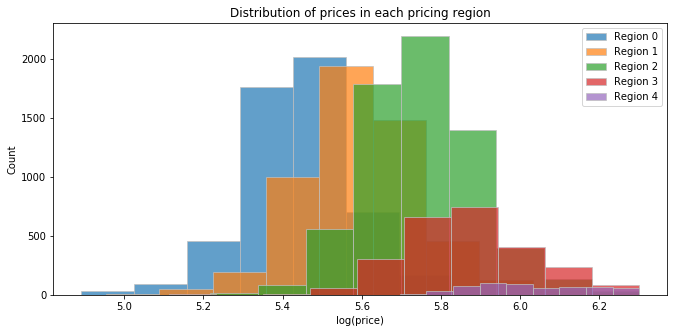

In [89]:
plt.figure(figsize=(11,5))
for i in range(nbuckets):
    plt.hist(df[df.region==i].log_price, alpha=.7, label='Region '+str(i), edgecolor='silver')
plt.legend()
plt.ylabel("Count")
plt.xlabel("log(price)")
plt.title("Distribution of prices in each pricing region")
_=""

In [90]:
# and check out the correlation of this new 'region' parameter with price
df[['log_price','region']].corr()

log_price    region
log_price   1.000000  0.725186
region      0.725186  1.000000

**Result:** We created a new feature 'region' which accounts for the location of the home by zipcode. This new parameter is highly correlated with price. In fact, at .725 it has the highest correlation of any other feature with price. We'll look to region to be a powerful predictor of sales price in our modeling.

In [91]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     3.071882  3.752048     1.0           0   
1  538000.0         3       2.25     3.409933  3.859859     2.0           0   
2  180000.0         2       1.00     2.886491  4.000000     1.0           0   
3  604000.0         4       3.00     3.292256  3.698970     1.0           0   
4  510000.0         3       2.00     3.225309  3.907411     1.0           0   

   view  grade  effective_age  log_price  region  
0     0      7             60   5.346157       0  
1     0      7             24   5.730782       1  
2     0      6             82   5.255273       1  
3     0      7             50   5.781037       2  
4     0      8             28   5.707570       2

# Results so far
To recap, we took a look at all the features that possibly could affect pricing. 

* bedrooms, **bathrooms**, floors
* **sqft_living**, sqft_lot
* view, waterfront
* **grade**
* effective_age (created based on year built and renovated year)
* **region** (created based on mean sales pricing by zipcode)

The features **in bold** look to be highly predictive of price based on correlations. (We'll verify this later.) 

We tested some assumptions, and found that both 'view' and 'waterfront' are significantly associated with sales prices. We found that loft homes garner about 27% more than homes without lofts.

We also found that the location of the home has a big impact on average selling prices. We created a new feature, region, based on the average sales prices in zipcodes.

Next, let's do some modeling work, so we can actually start predicting prices!


# Linear regression modeling
Now let's turn our attention to creating a model to predict sales prices. We'll start by throwing the kitchen sink at a linear regression model, by including just about every feature we have available. This will help us get a baseline feeling for how well (or poorly) a non-engineered solution turns out. Then, we'll do some feature engineering and parameter reduction to try to land on a good, all-purpose model to predict sales prices accurately.

### Training and test datasets
We'll need to divide our data into training and testing sets so we can evaluate the strengths of each of our iterations.

In [92]:
# divide into train and test
from sklearn.model_selection import train_test_split
X=df.drop(['price','log_price'],axis=1)
y=df['log_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=103)

In [93]:
# scale our features using MinMax scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X_train) # preserve this scaler for use on test (and any subsequent) data

X_train= pd.DataFrame( scaler.transform(X_train), columns=df.drop(['price','log_price'],axis=1).columns,
                     index=X_train.index)

X_test = pd.DataFrame( scaler.transform(X_test), columns=df.drop(['price','log_price'],axis=1).columns,
                     index=X_test.index)

# and set up a df_train and df_test for use in statsmodels, which likes 
# the features and the label together in one dataframe
df_train = pd.concat([X_train,y_train],axis=1)
df_test  = pd.concat([X_test,y_test],axis=1)
#df_train.head()

## Kitchen-sink model
Let's do a non-engineered linear regression and get some baselines. We'll use all available features.

In [94]:
# use statsmodels ols fitting
import statsmodels.formula.api as sm

In [95]:
# throw the entire featureset at it. 
features = 'grade + bedrooms + bathrooms + floors + view + waterfront + \
            sqft_living + region + sqft_lot + effective_age'
model = sm.ols(formula='log_price ~ ' + features, data=df_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     6879.
Date:                Sat, 01 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:18:31   Log-Likelihood:                 14749.
No. Observations:               15178   AIC:                        -2.948e+04
Df Residuals:                   15167   BIC:                        -2.939e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0358      0.005   1057.393

The p-values for all the features come out <.001, which suggests that each one of them contributes to the sales price. The features with the largest effects are:

* region
* sqft_living
* grade

which matches nicely with our expectations. If we were to jettison any features, the following would be good candidates, since their coefficients' standard errors are somewhat larger (at least compared to the above three features).

* bedrooms
* floors
* sqft_lot
* waterfront

Some of the coefficients, bedrooms and sqft_lot, come out negative, which seems odd (but might be true). It's possible this simple kitchen-sink model is overfitting. Let's look at some metrics to see.

SSR: 127.27
SST: 704.52
SSE: 577.25
r2: 0.819
Root mean squared error (RMSE): 0.0916


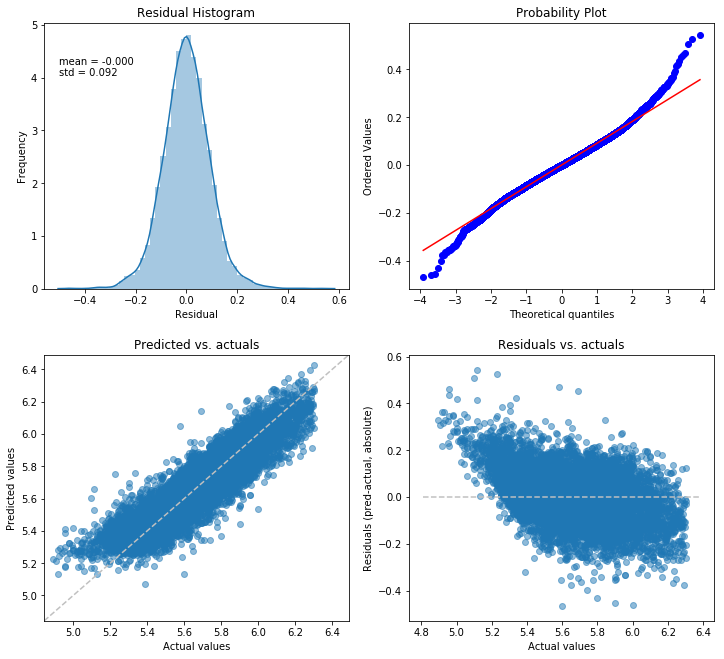

In [96]:
# function to evaluate the differences between two series.
# send in the actuals and the predicted values.
def eval_model(actuals,pred,plot=False):
    # in case of sending in pandas, reset any indexes (otherwise messes up subtraction)
    if("pandas" in str(type(actuals))):
        actuals = actuals.reset_index(drop=True)
    if("pandas" in str(type(pred))):
        pred = pred.reset_index(drop=True)

    ymean = np.mean(actuals)
    ssr = np.sum( (actuals - pred)**2 )
    sst = np.sum( (actuals - ymean)**2 )
    sse = np.sum( (pred - ymean)**2 )
    rmse = np.sqrt( 1/len(actuals) * np.sum( (actuals-pred)**2 ) )
    r2 = 1 - ssr/sst
    
    print("SSR: {:.2f}".format(ssr))
    print("SST: {:.2f}".format(sst))
    print("SSE: {:.2f}".format(sse))
    print("r2: {:.3f}".format(r2))
    print("Root mean squared error (RMSE): {:.4f}".format(rmse))
    
    if(plot):
        # (1) plot a histogram of the residuals...
        resids = pred-actuals
        fig, axes = plt.subplots(2,2,figsize=(12,11))
        plt.subplots_adjust(hspace=.25)
        plt.axes(axes[0,0])
        sns.distplot(resids, hist=True)
        plt.xlabel('Residual')
        plt.ylabel('Frequency')
        plt.title('Residual Histogram')
        # draw the mean and std into the plot:
        plt.text(0.05, .8,'mean = {:.3f}\nstd = {:.3f}'.format(np.mean(resids),np.std(resids)),transform = axes[0,0].transAxes)
        
        # (2) check the distribution of mean differences, compare with normal
        scipy.stats.probplot(resids,plot=axes[0,1],dist='norm')
        
        # (3) plot the actuals vs. predicted
        plt.axes(axes[1,0])
        plt.scatter(actuals,pred,alpha=.5)
        plt.title("Predicted vs. actuals")
        plt.xlabel("Actual values")
        plt.ylabel("Predicted values")
        axmin = np.min([actuals,pred])*.99
        axmax = np.max([actuals,pred])*1.01
        plt.xlim(axmin,axmax)
        plt.ylim(axmin,axmax)
        # draw a 45 degree reference line:
        x = np.linspace(*axes[1,0].get_xlim())
        plt.plot(x, x, '--', color='silver')
        
        # (4) plot the residuals vs. actuals
        plt.axes(axes[1,1])
        plt.scatter(actuals,resids,alpha=.5)
        plt.title("Residuals vs. actuals")
        plt.xlabel("Actual values")
        plt.ylabel("Residuals (pred-actual, absolute)")
        # draw a line at y=0
        x=axes[1,1].get_xlim()
        plt.hlines(0,x[0],x[1],color='silver',linestyles='--')        
        
# get model predictions:
pred = results.predict(df_train)        

# and evaluate model:
eval_model(y_train, pred, plot=True)   

**Results:** The kitchen-sink model actually didn't perform too badly. It explains about 82% of the variance. The RMSE is a compact 0.092 compared to predicted values on the order of 5 to 6. Residuals are nicely distributed normally around 0. 

For a home in the median price range (\$510,000; remember, this is Seattle), we can calculate the confidence interval for price based on the distribution of residuals (std = .092). The 68% confidence interval turns out to be around \$400,000 to \$631,000, a variation of about 23% of the mean price. In human language, this means that we can be fairly confident that this model predicts the sales price to within 23%.

The residuals for homes less than \$200,000 look to be larger on average than more expensive homes. This is indicated by the little tail in the residuals plots at the lower end of price. Our model will be less predictive for homes in the lower price range, but that's probably OK, since in Seattle most homes list for prices well above $200,000.

Now let's bring in our test dataset and see how well kitchen-sink does predicted its values.

In [97]:
model = sm.ols(formula='log_price ~ ' + features, data=df_test)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     2348.
Date:                Sat, 01 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:18:33   Log-Likelihood:                 5014.6
No. Observations:                5060   AIC:                        -1.001e+04
Df Residuals:                    5049   BIC:                            -9935.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0242      0.008    622.482

SSR: 40.82
SST: 230.65
SSE: 189.83
r2: 0.823
Root mean squared error (RMSE): 0.0898


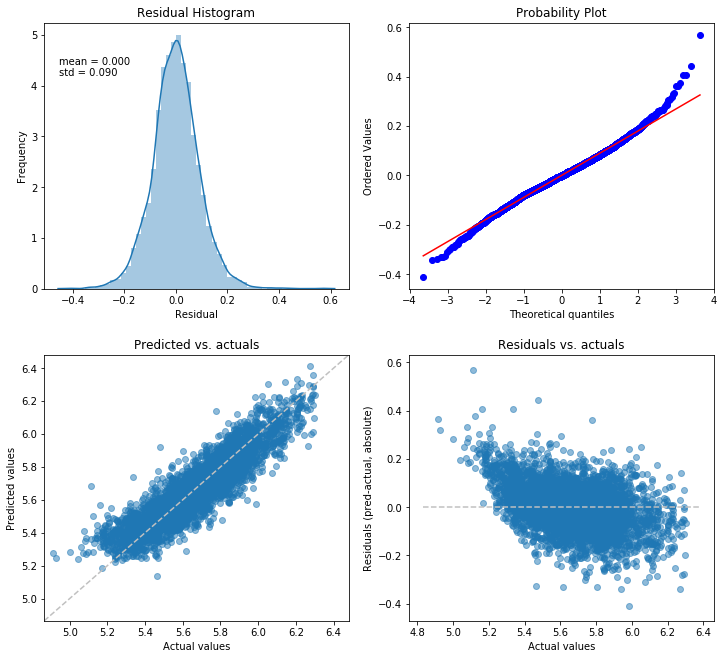

In [98]:
# get model predictions
pred = results.predict(df_test)        
eval_model(y_test, pred, plot=True)  

**Results:** Pretty good! The kitchen-sink model applied to the test data shows very consistent results with our train data. The most important features turn out to be identical:

* region
* sqft_living
* grade

and the R<sup>2</sup> comes out 82% with a RMSE of .090. These values match what we saw during training. 

One difference is that bedrooms and floors are no longer significant features: they have p-values far above .05, so we can't say for sure that they are predictive of price.

## Stepwise feature reduction
Let's see if we can reduce the number of features and whether that improves the model. We'll take a backwards stepwise reduction approach, starting with all features and removing them one by one. We'll stop when the model doesn't improve.

In [99]:
def backward_selected(data, response):
    """Linear model designed by backward selection. Based on AIC

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
    """
    # Start with all factors and intercept
    possible_factors = set(data.columns)
    possible_factors.remove(response)
    formula = "{} ~ {} + 1".format(response, ' + '.join(possible_factors))
    best_aic = sm.ols(formula, data).fit().aic   
    
    current_aic = best_aic
    
    # Set a non-empty set of columns that will be labeled as "to remove and try"
    to_try_remove = possible_factors
    
    # Check if any variables remain and if we haven't improved by adding any yet
    while to_try_remove: #and current_aic == best_aic:
        aic_candidates = []
        for candidate in to_try_remove:
            
            columns = possible_factors - set([candidate])
            # Try removing the candidate column
            formula = "{} ~ {} + 1".format(response, ' + '.join(columns))
            # Get AIC
            aic = sm.ols(formula, data).fit().aic
            
            # Append tuple of the form (aic, response)
            aic_candidates.append((aic, candidate))
            #print(candidate,aic)
            
        # Sort all the pairs by the first entry of tuple (default of sort() method)
        aic_candidates.sort()
        # Remember that the sort() method sorts by smallest to largest of first entry here.
        #   If you were to change the criteria to something that needs to be maximized, change sort/pop order!
        best_new_aic, best_candidate = aic_candidates.pop(0)
        #print("Testing:",best_candidate,"AIC = ",best_new_aic)
        
        # Now check if we have something better:
        if best_new_aic < current_aic:
            # Remove the best candidate's name from possible_factors
            
            possible_factors.remove(best_candidate)    
            current_aic = best_new_aic                    
            #to_try_remove.remove(best_candidate)
            
        else:
            #to_try_remove.remove(best_candidate)
            break
            
        # Now we repeat the process with all the remaining candidate columns

    # Here is the final formula!
    formula = "{} ~ {} + 1".format(response, ' + '.join(possible_factors))
    # Get the model object
    model = sm.ols(formula, data).fit()
    return model

backwards_model = backward_selected(df_train[['region','bedrooms','bathrooms','grade','effective_age','sqft_lot',\
                                              'sqft_living','view','floors','waterfront','log_price']], 'log_price')

print("Best model:",backwards_model.model.formula)

print('Adjusted R-Squared: {:.2f}'.format(backwards_model.rsquared_adj))
print('AIC: {:.1f}'.format(backwards_model.aic))

Best model: log_price ~ grade + waterfront + floors + sqft_lot + bathrooms + effective_age + sqft_living + view + bedrooms + region + 1
Adjusted R-Squared: 0.82
AIC: -29475.5


**Results:** Surprisingly, the backwards-selecting approach likes the model with the full set of features from kitchen-sink model. It's possible we did a great a job with our feature preparation. 

To confirm, we tried a forward-selecting stepwise approach, where we build up features starting with one. This approach resulted in the same result: the model with all the features provided the best estimates.

## Minimal-feature model approach
Let's examine a model based on the features we think are most predictive. As explored in the correlation plot, and confirmed though the kitchen-sink model, these three fields appear to be really predictive of price:

* region
* sqft_living
* grade

Let's use them in a regression model and see how the metrics come out. We can compare to the kitchen-sink model. 


In [100]:
# use the features we think will be most predictive.
features = 'region + grade + sqft_living'

model = sm.ols(formula='log_price ~ ' + features, data=df_train)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 1.839e+04
Date:                Sat, 01 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:18:36   Log-Likelihood:                 13402.
No. Observations:               15178   AIC:                        -2.680e+04
Df Residuals:                   15174   BIC:                        -2.677e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0816      0.003   1481.838      

SSR: 151.97
SST: 704.52
SSE: 552.55
r2: 0.784
Root mean squared error (RMSE): 0.1001


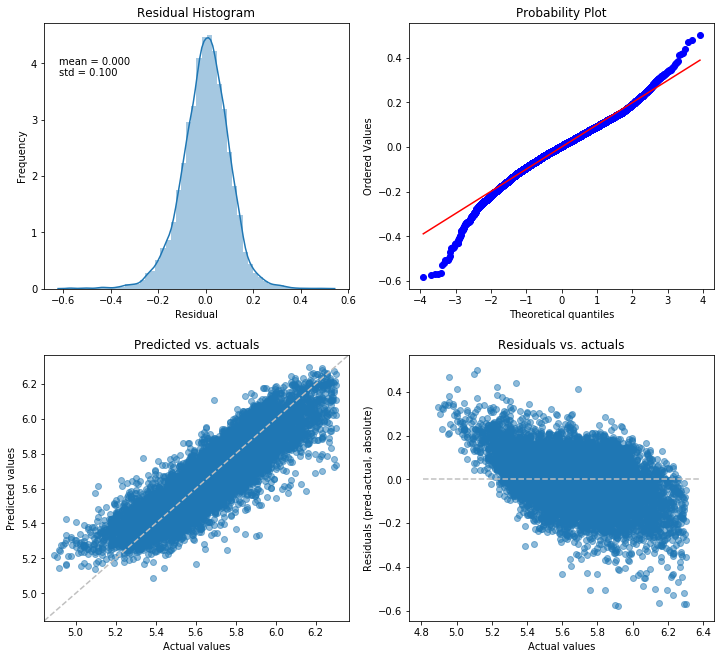

In [101]:
# get model predictions
pred = results.predict(df_train)        
eval_model(y_train, pred, plot=True)  

**Results:** Slightly poorer predictive power than our kitchen-sink model. In this three-feature version, our R<sup>2</sup> comes out 78% with an RMSE just a little higher at 0.10. Let's take our test data against this minimal-feature model to see how the model does predicting from the test set.

In [102]:
model = sm.ols(formula='log_price ~ ' + features, data=df_test)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     6177.
Date:                Sat, 01 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:18:37   Log-Likelihood:                 4529.8
No. Observations:                5060   AIC:                            -9052.
Df Residuals:                    5056   BIC:                            -9026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0707      0.006    864.580      

SSR: 49.44
SST: 230.65
SSE: 181.21
r2: 0.786
Root mean squared error (RMSE): 0.0988


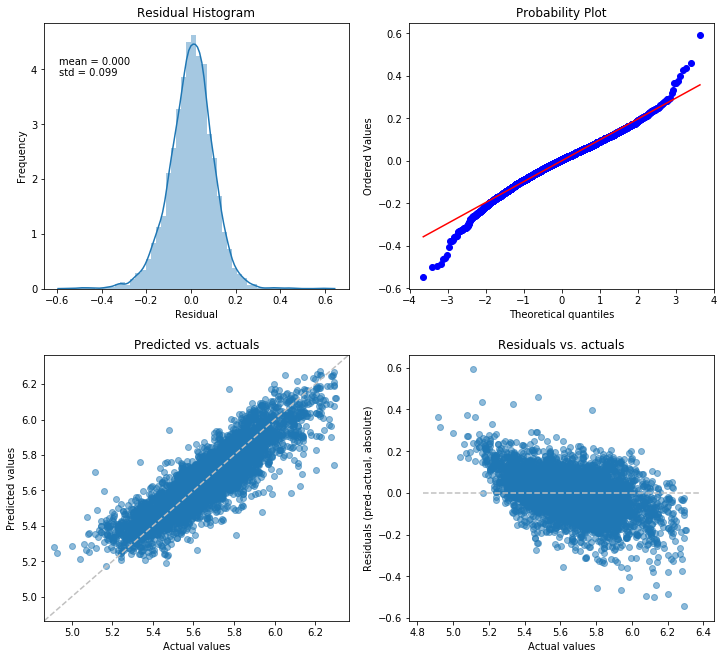

In [103]:
# get model predictions
pred = results.predict(df_test)        
eval_model(y_test, pred, plot=True)  

**Results:** With an R<sup>2</sup> of 79% and an RMSE of 0.099, the three-feature model performs identically on test data as on train, and just a bit below with the performance of the kitchen-sink model. It would be acceptable to use the three-feature model in place of kitchen-sink; it should generalize better to more diverse data, having been fitted to fewer parameters.

## SVD analysis of features
Now let's look at the SVD analysis of our 10 features, and see where we might improve our collection. This probably won't result in anything especially useful, since we've already figured out the primary features and determined most of the features contribute, but is an interesting exercise.

Step 1: Get an SVD decomposition of the feature matrix

In [104]:
# use the X_train as our matrix, A, in Ax=y, where x is the vector of coefficients and 
# y are predicted values.

# first find the singular values
s = np.linalg.svd(X_train.values, full_matrices=True, compute_uv=False)
print("Singular values:",s)

Singular values: [ 152.83262309   39.858125     32.21868794   22.74313619   20.93066125
   13.78961973   10.95546261    8.71921241    7.66000228    7.2070113 ]


**Results:** None of the singular values is vanishing, so each of the features we have in our 10 feature set contribute to the pricing prediction. We kind of expected this. Let's continue though with an SVD decomposition.

Step 2: Do a least squares fit to find coefficients for the features, and apply to train and test data

In [105]:
# account for the intercept by tacking on a column of '1'
A=X_train.copy()
A['ones']=1

In [106]:
beta_coeffs, resids, rank, s = np.linalg.lstsq(A.values, y_train)
print("Beta coeffs:",beta_coeffs)
print("Rank:", rank)

Beta coeffs: [-0.04949797  0.09774352  0.481858   -0.04292432  0.0155076   0.19817402
  0.12336537  0.39737928  0.12560216  0.4233659   5.03578718]
Rank: 11


The feature matrix is full rank, and none of the coefficients is hugely smaller than the largest. We aren't expecting to be able to eliminate features this way. But, let's check out predictions and compare to actuals.

SSR: 127.27
SST: 704.52
SSE: 577.25
r2: 0.819
Root mean squared error (RMSE): 0.0916


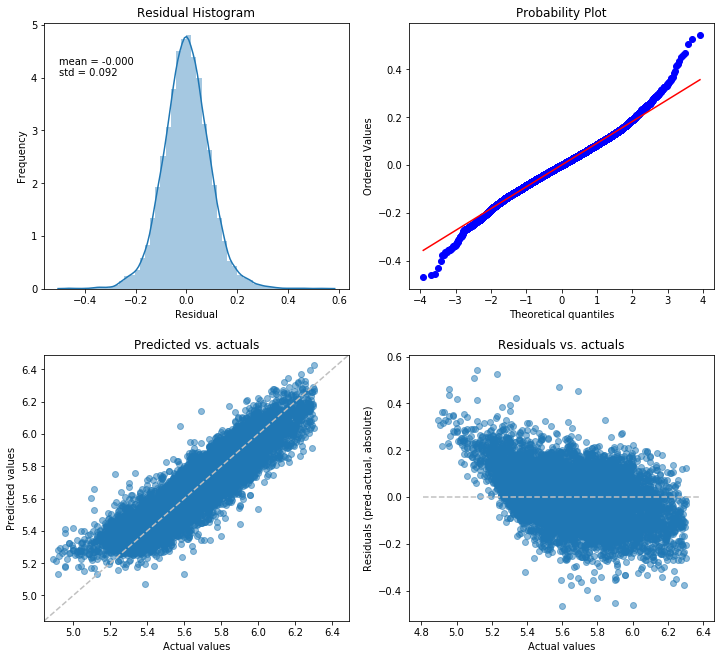

In [107]:
y_pred = np.dot(A.values, beta_coeffs) 
eval_model(y_train,y_pred,plot=True)

**Results:** These results match our kitchen-sink model pretty much exactly. The SVD R<sup>2</sup> is 82%, with a RMSE of 0.092. SVD provides no added benefit to our 10-term model. Let's just check how well this does with the test dataset.

SSR: 41.00
SST: 230.65
SSE: 192.75
r2: 0.822
Root mean squared error (RMSE): 0.0900


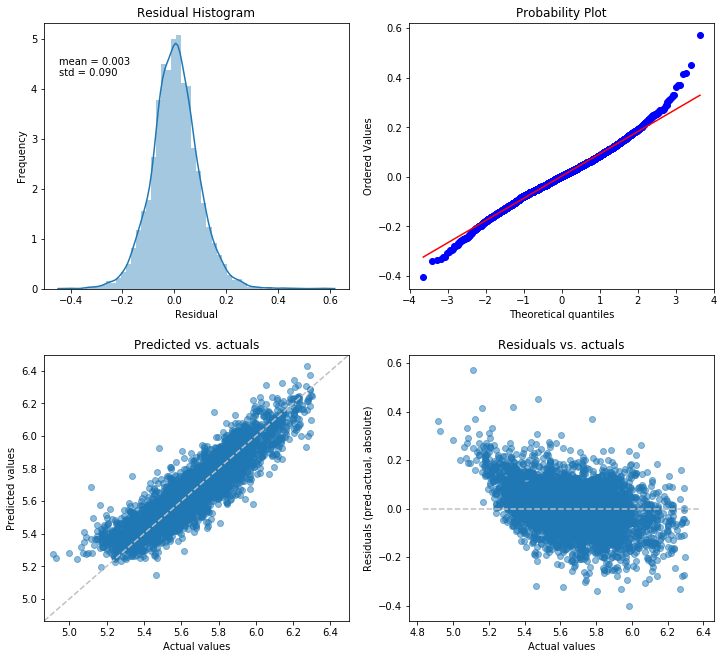

In [108]:
A=X_test.copy()
A['ones']=1
y_pred = np.dot(A.values, beta_coeffs)
eval_model(y_test,y_pred,plot=True)

As expected, the results of SVD on the test dataset are compatible with the other models so far. This isn't surprising, since we didn't reduce dimensionality during our SVD analysis, so we're effectively just doing the same calculations. Let's move on to a dimensionality-reduction approach next.

## PCA feature analysis
Here let's give PCA a chance to reduce the dimensionality of our problem. We have 10 features, most all of which we think so far are contributing – at some level – to the price prediction. But, in the interest of exploring how far we might reduce our feature set, let's try PCA and see what happens. PCA will give us a chance to see if our 10 features are related in some way, and if so, whether we can reduce the effects of their similarity.

In [109]:
from sklearn.decomposition import PCA

In [110]:
# first do PCA on all 10 principal components to see where the contributions lie
pca = PCA()
pca.fit(X_train)
pca_result = pca.transform(X_train.reset_index(drop=True)) # resetting the index, the randomized index values are not necessary
pca_df = pd.DataFrame(data = pca_result, columns = ['pc'+str(ix) for ix in range(pca_result.shape[1])] )
pca_df['log_price'] = y_train.reset_index(drop=True) # resetting index is CRITICAL so your y matches up with the original data order!

In [111]:
print(pca_df.head())
print("\nExplained variance ratios:\n",pca.explained_variance_ratio_)
print("\nCumulative explained variance ratios:\n",pca.explained_variance_ratio_.cumsum())
print("\nSum of variance ratios:",np.sum(pca.explained_variance_ratio_))

        pc0       pc1       pc2       pc3       pc4       pc5       pc6  \
0  0.413307  0.274382  0.048961 -0.169687  0.087849  0.038192 -0.202968   
1 -0.372517  0.068962  0.072022 -0.014148  0.274160  0.111343 -0.169501   
2  0.208595 -0.233606 -0.203803  0.049440 -0.038444 -0.007124 -0.055632   
3 -0.145480 -0.116233  0.028552 -0.116716 -0.161684 -0.006213 -0.009670   
4 -0.200226  0.303317 -0.155660  0.083748  0.185574 -0.034907  0.132496   

        pc7       pc8       pc9  log_price  
0 -0.012650  0.005394 -0.037660   5.829304  
1 -0.034217 -0.023542  0.095014   5.361728  
2  0.074780 -0.012421  0.005829   5.469822  
3  0.011391 -0.004199  0.026300   5.553276  
4 -0.065858  0.019353  0.010751   5.793790  

Explained variance ratios:
 [ 0.35245551  0.23552789  0.1406714   0.0964602   0.07429948  0.03815272
  0.02450504  0.01534713  0.01206755  0.01051307]

Cumulative explained variance ratios:
 [ 0.35245551  0.5879834   0.72865481  0.82511501  0.89941449  0.93756721
  0.96207225  

The 11 principal components explain from 1 to 35% of the variance. Let's look at the contributions of each component in a chart. We're doing this to see if we can cut down on dimensions.

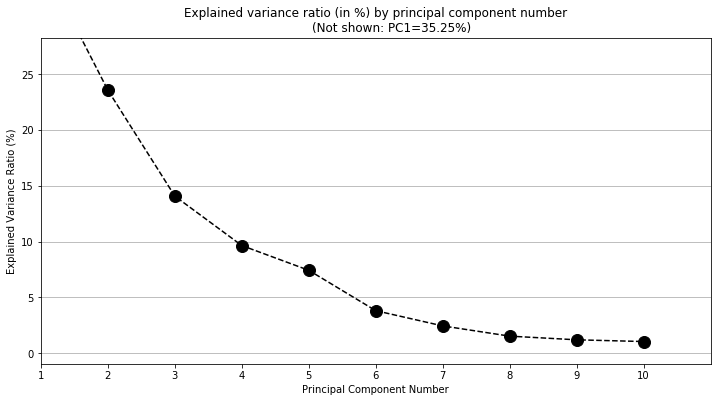

In [112]:
# number of principal components:
N_components = len(pca.components_)

# Plot the explained variance for all 16 principal components
# Note: If the first value is too large, it may dwarf how the rest look.
#   You may consider plotting starting with the 2nd value (python index at 1)
plt.figure(figsize=(12,6))
plt.grid(axis='y')

# plot points
plot_y = pca.explained_variance_ratio_ * 100
plt.plot(np.arange(1,N_components+1),plot_y,'ko--',markersize=12)
plt.xlim(1,N_components+1)
plt.xticks( np.arange(1,N_components+1) ) # make all ticks show up
plt.title('Explained variance ratio (in %) by principal component number\n\
        (Not shown: PC1={:.2f}%)'.format(plot_y[0]))
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio (%)')

# adjust scale so the first one doesn't dominate:
plt.ylim(-plot_y[1]*.04,plot_y[1]*1.2)
_=""

And make a plot of cumulative explained variance, so you can see instantly how many components to choose for a certain percentage of explained variance.

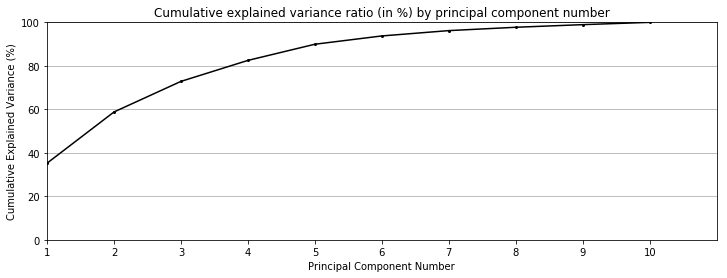

In [113]:
plt.figure(figsize=(12,4))
plt.grid(axis='y')
plt.plot([i+1 for i in range(X_train.shape[1])], pca.explained_variance_ratio_.cumsum()*100, 'ko-', markersize=2)
plt.xlim(1,N_components+1)
plt.ylim(0,100)
plt.xticks( np.arange(1,N_components+1) ) # make all ticks show up
plt.title('Cumulative explained variance ratio (in %) by principal component number')
plt.xlabel('Principal Component Number')
plt.ylabel('Cumulative Explained Variance (%)')
_=""

**Results:** 90% of the variance can be explained by the first 5 principal components, each of which contributes 5% or more to the total. Therefore, we may consider dropping the last 5 components, each of which contribute less than 5%, from our predictive model. This may help us better generalize to datasets beyond our training set.

And let's look at the makeup of each principal component. We're just seeing that the components are made up of linear combinations of features, and they are ideally all independent of each other.

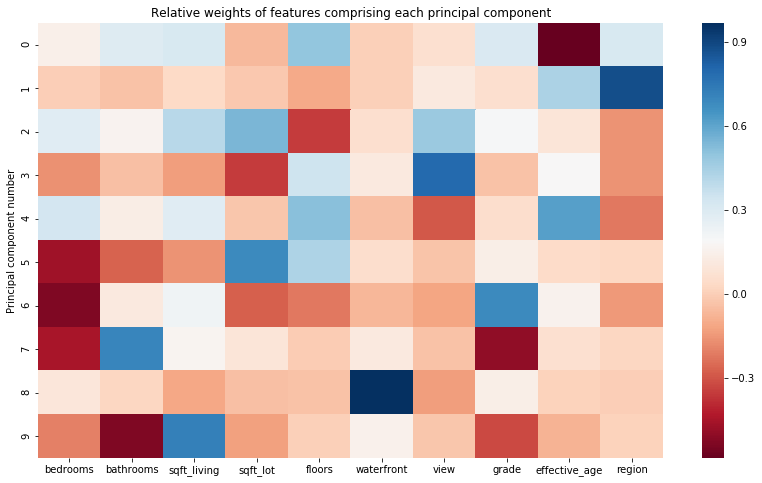

In [114]:
# get a look at how the principal components shake out. 
# this chart shows the linear combinations of features making up each pc.
plt.figure(figsize=(14,8))
sns.heatmap(pd.DataFrame(pca.components_,columns=X_train.columns.tolist()),cmap='RdBu')
plt.ylabel("Principal component number")
plt.title("Relative weights of features comprising each principal component")
_=""

Now we're ready to establish a linear regression model using the PCA-reduced dimensionality. We'll go with the 5 components we found above. Let's find their beta coefficients.

In [115]:
# how many components to go with.
ncomps = 5

target_label = 'log_price'
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x) for x in range(ncomps)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end
print(formula_final)

pcr_model = sm.ols(formula = formula_final, data=pca_df)
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

log_price ~ pc0 + pc1 + pc2 + pc3 + pc4
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 1.156e+04
Date:                Sat, 01 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:18:44   Log-Likelihood:                 13683.
No. Observations:               15178   AIC:                        -2.735e+04
Df Residuals:                   15172   BIC:                        -2.731e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

SSR: 146.46
SST: 704.52
SSE: 558.06
r2: 0.792
Root mean squared error (RMSE): 0.0982


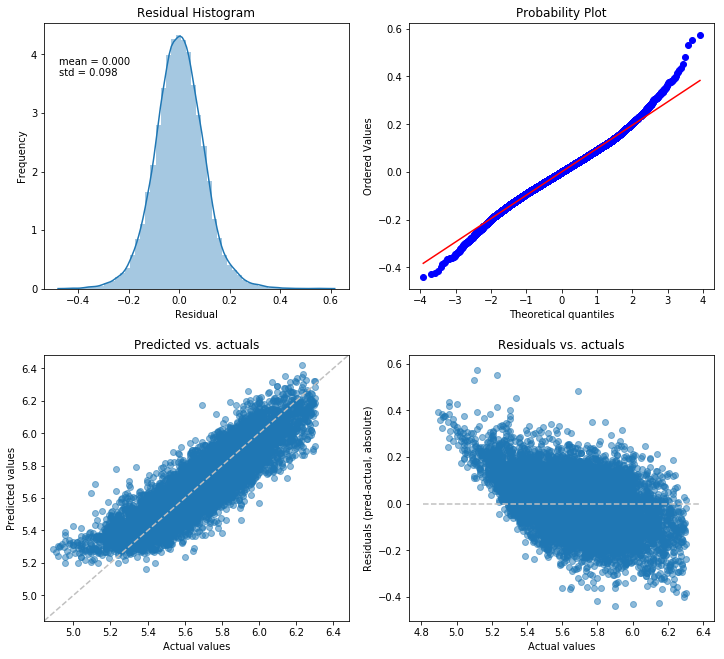

In [116]:
# get model predictions
pred = results.predict(pca_df)   
eval_model(y_train, pred, plot=True)  

**Results:** Just about the same model performance as we've seen in all models so far. Our RMSE is 0.098, with an R<sup>2</sup> of 79%. Seeing as none of the principal components is vanishingly small, this suggests our original 10 features is probably a fairly well-chosen set: linearly independent, and all contributing to the price prediction.

Let's check how the PCA model generalizes to test, maybe there's something interesting there.

SSR: 47.05
SST: 230.65
SSE: 187.05
r2: 0.796
Root mean squared error (RMSE): 0.0964


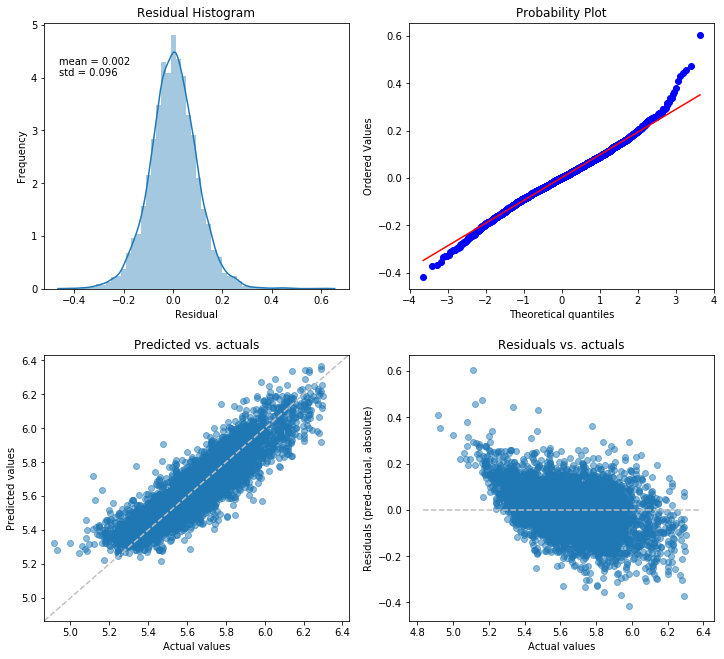

In [117]:
# transform the X_test features into our PCA world
pca_result_test = pca.transform(X_test) 
pca_test_df = pd.DataFrame(data = pca_result_test, columns = ['pc'+str(ix) for ix in range(pca_result.shape[1])] )

# and run the fitted 5-pc regression model to get predictions
# get model predictions
pred_test = results.predict(pca_test_df)   
eval_model(y_test, pred_test, plot=True)  

**Results:** Our PCA model generalizes very well to test data. As shown above, the RMSE is a consistent 0.096 with an R<sup>2</sup> of 80%. These match the performance of the model on training data. PCA does not suggest our features are highly linearly dependent with each other. We should feel confident that the 10 features we started out with make up a pretty solid, linearly independent set of features. 

# Recap and next steps
Thank you for looking through this backgrounder of the King County Home Price Estmator™. We hope you found useful information that can help you and your listing agent effectively price your home. Let's recap what we learned, and outline where to go from here.



<img src="http://cosbldgconnection.wpengine.netdna-cdn.com/wp-content/uploads/2017/08/Lyle-Bicknells-house.jpg"
     alt=""
     width="300px"
     style="float: right; margin-left: 12px; border-bottom:20px black solid;" />

**Explored a full year of sales price data**

* Our engineers examined <a href="https://public.tableau.com/profile/logan.downing#!/vizhome/KingCountyHomeSales/Dashboard" target="_blank">every sale that happened in King County in 2015</a>. They enumerated the features that are most likely predictive of price like sqft_living and grade. They also engineered a couple additional ones: region based on zip code, and effective_age based on the year a home was built and when it was last renovated. 
  

* We explored some interesting characteristics of home sale prices. We found that features including a view and a waterfront provide statistically-significant increases in prices from homes without those features.
  

* We found that homes with lofts sell for about 27% more than homes without them.

** Created several models and compared their predictive power**

* The kitchen-sink model includes all ten features, and performed very well. We are able to predict the sales price to within about 23% for homes in the midrange of pricing.
  
  
* A minimal-feature model including just the top three features also performed pretty well, approaching the performance of the full-featured model. This model can be used to generalize to additional data easily.
  

We tried eliminating features to see if predictions of our validation data would improve, using:
* stepwise feature reduction, where we explored models with increasingly fewer features;
* SVD, to see if any of our features contributed little or nothing to the model, and
* PCA, to determine if any of our features were dependent on each other.



We discovered that none of these approaches improved predictive power. As a result, we concluded that the ten engineered features are a solid choice for our modeling work.

** Improvements **

One next step we are working on is seeing if we can find a feature that better predicts home prices at the lower end of the price range. Homes selling for less than $200,000 generally have higher uncertainties, and our model isn't as effective in those predictions.



### Bottom line for you, as you list your home

We are confident that the King County Home Price Estimator™ will be able to provide you a good estimate of your home's selling price. Our models will provide an estimate over most price ranges that will be within 23% of the actual selling price. Knowing your home's anticipated sales price will help you list your home with confidence.

Thank you for considering our services, and we wish you the best sales experience. 